# ISB-CGC Community Notebooks
Check out more notebooks at our [Community Notebooks Repository](https://github.com/isb-cgc/Community-Notebooks)!

```
Title:   How to visualize results from BigQuery
Author:  David L Gibbs
Created: 2019-07-17
Purpose: Demonstrate how visualize the results from a query.
URL:     https://github.com/isb-cgc/Community-Notebooks/blob/master/Notebooks/How_to_plot_BigQuery_results.ipynb
Notes:   
```
***

# How to visualize results from BigQuery

In this example, we'll perform a few easy queries, and use the python Seaborn library to 
visualize the results.

Library documentation: https://seaborn.pydata.org/

There's many python tutorials on using the Seaborn library for plotting.
For example, https://elitedatascience.com/python-seaborn-tutorial

## Initial setup

In [ ]:
# If you start your jupyter notebook session using the 
# Community-Notebook/VM-Notebook-Launcher then you're already logged in!

# !gcloud auth application-default login

In [2]:
!pip3 install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/89/61/465fb3bfba684b0f53b5c4829c3c89e86e6fe9fdcdfda93e38f1788090f0/matplotlib-3.0.3-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bb/ef/d5a21cbc094d3f4d5b5336494dbcc9550b70c766a8345513c7c24ed18418/numpy-1.16.4-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/14/49/8f13fa215e10a7ab0731cc95b0e9bb66cf83c6a98260b154cfbd0b55fb19/scipy-1.3.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/74/24/0cdbf8907e1e3bc5a8da03345c23cbed7044330bb8f73bb12e711a640a00/pandas-0.24.2-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/d9/3ec19e966301a6e25769976999bd7bbe552016f0d32b577dc9d63d2e0c49/pyparsing-2.4.0-py2.py3-none-any.whl
  Using cach

In [3]:
!pip3 install google-cloud-bigquery

    100% |████████████████████████████████| 133kB 4.0MB/s ta 0:00:01
    100% |████████████████████████████████| 1.2MB 1.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ec/51/f45cea425fd5cb0b0380f5b0f048ebc1da5b417e48d304838c02d6288a1e/setuptools-41.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 71kB 10.6MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 10.7MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/3d/73/fe30c2daaaa0713420d0382b16fbb761409f532c56bdcc514bf7b6262bb6/pytz-2019.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 61kB 10.3MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 11.0MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 8.1MB/s eta 0:00:01
    100% |████████████████████████████████| 1

## Defining helper functions

In [8]:
import seaborn as se
from google.cloud import bigquery

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

In [5]:
def runQuery ( client, qString, dryRun=False ):
  
  print ( "\n in runQuery ... " )
  if ( dryRun ):
    print ( "    dry-run only " )
    
  ## set up QueryJobConfig object
  job_config = bigquery.QueryJobConfig()
  job_config.dry_run = dryRun
  job_config.use_query_cache = True
  job_config.use_legacy_sql = False
  
  ## run the query
  try:
    query_job = client.query ( qString, job_config=job_config )
    ## print ( "    query job state: ", query_job.state )
  except:
    print ( "  FATAL ERROR: query execution failed " )
    return ( None )
  
  ## return results as a dataframe (or an empty dataframe for a dry-run) 
  if ( not dryRun ):
    try:
      df = query_job.to_dataframe()
      if ( query_job.total_bytes_processed==0 ):
        print ( "    the results for this query were previously cached " )
      else:
        print ( "    this query processed {} bytes ".format(query_job.total_bytes_processed) )
      if ( len(df) < 1 ):
        print ( "  WARNING: this query returned NO results ")
      return ( df )
    except:
      print ( "  FATAL ERROR: query execution failed " )
      return ( None )
    
  else:
    print ( "    if not cached, this query will process {} bytes ".format(query_job.total_bytes_processed) )
    ## return an empty dataframe
    return ( pd.DataFrame() )
 


def checkQueryResults ( qr ):
  print ( "\n in checkQueryResults ... " )
  if ( not isinstance(qr, pd.DataFrame) ):
    print ( " query execution failed! " )
    return ( False )
  else:
    if ( len(qr) > 0 ): 
      print ( " # of rows in query results: {} ".format(len(qr)) )
      print ( "\n", qr.head() )
    else:
      print ( " query returned NO results ?!? " )  
    return ( True )

In [10]:
# User your own project ID

project_id = 'your_project_number'
if project_id == 'your_project_number':
    print('Please update the project number with your Google Cloud Project')
else:
    bqclient = bigquery.Client(project=project_id)

## Making barplots

In [21]:
# We define queries as strings #

sql = '''
SELECT
   icd_10,
   COUNT(*) as Count
FROM
   `isb-cgc.TCGA_bioclin_v0.Clinical`
GROUP BY
   1  -- this is the same as 'group by icd_10'
ORDER BY
   Count
'''

res0 = runQuery ( bqclient, sql, dryRun=False )

res0[0:5]


 in runQuery ... 
    this query processed 74236 bytes 


,icd_10,Count
0,C02.2,1
1,C51.9,1
2,C44.3,1
3,C53.1,1
4,C49.8,1


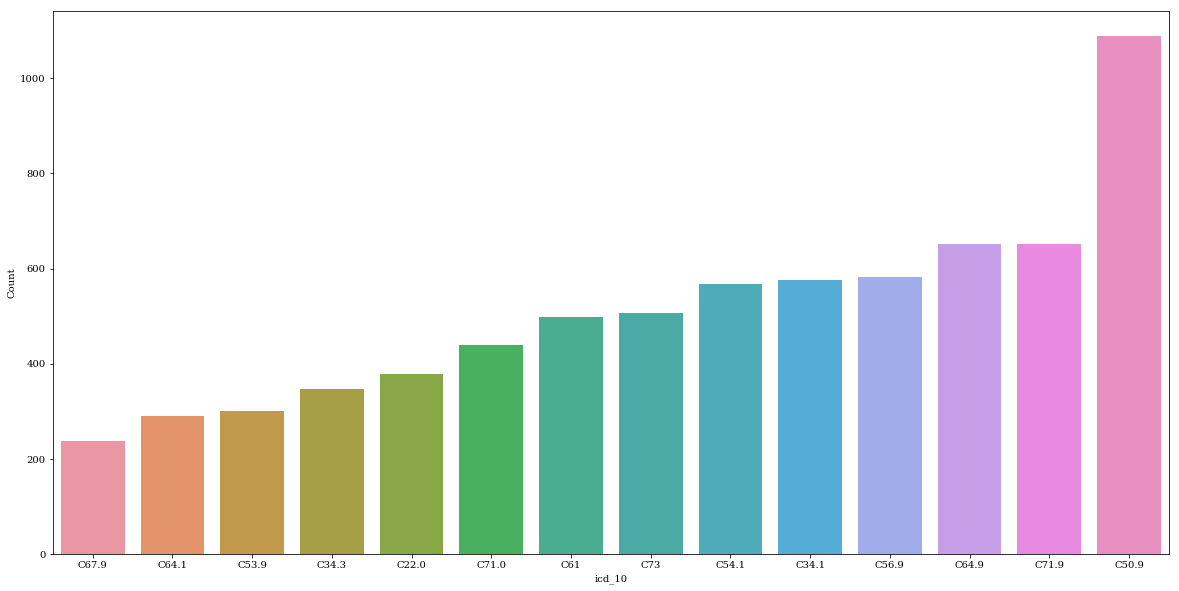

In [26]:
# first I'll subset the results,
# there's a lot of categories!
res1 = res0[res0['Count'] > 200]

# then we'll make a bar plot
p = se.barplot(data=res1, x = 'icd_10', y = 'Count')

## Making scatter plots

In [27]:
sql = '''
SELECT
   avg_percent_neutrophil_infiltration,
   avg_percent_lymphocyte_infiltration
FROM
   `isb-cgc.TCGA_bioclin_v0.Biospecimen`
GROUP BY
   1,2
'''

res3 = runQuery ( bqclient, sql, dryRun=False )

res3[0:5]


 in runQuery ... 
    this query processed 138600 bytes 


,avg_percent_neutrophil_infiltration,avg_percent_lymphocyte_infiltration
0,10.0,40.0
1,0.0,85.0
2,1.5,8.5
3,3.0,9.0
4,5.0,6.0


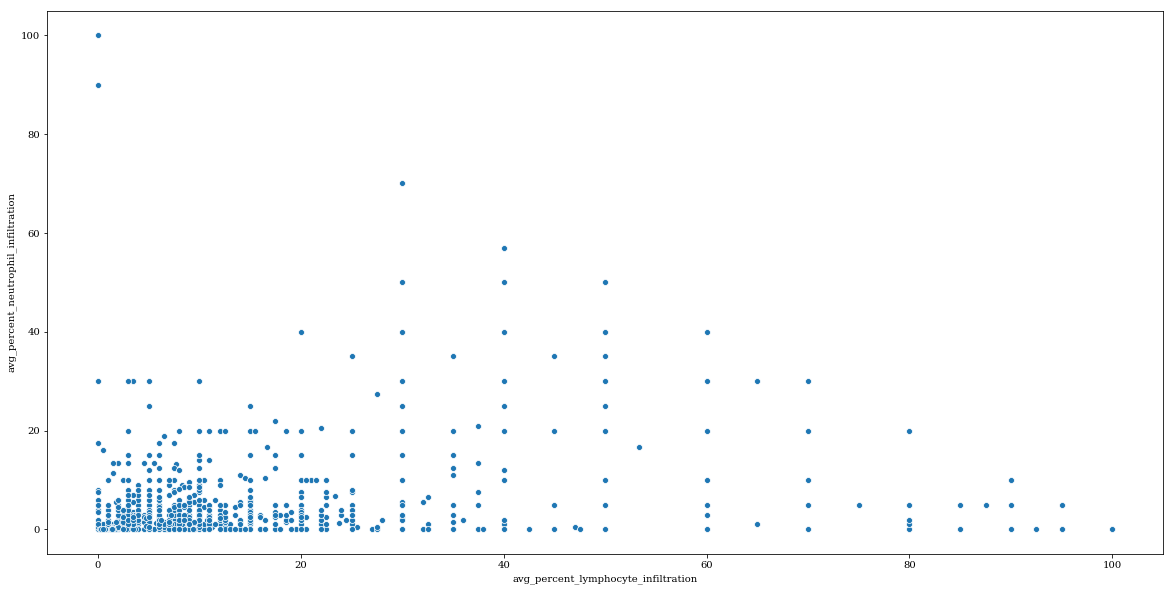

In [29]:
se.scatterplot(data=res3, x='avg_percent_lymphocyte_infiltration', y='avg_percent_neutrophil_infiltration')